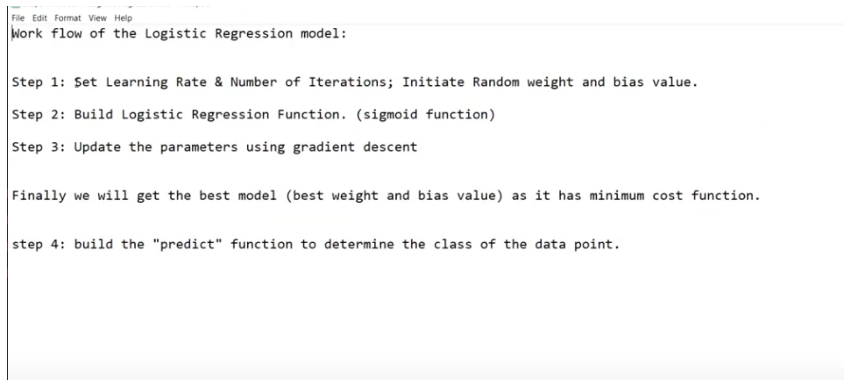

In [30]:
import numpy as np
import pandas as pd

df=pd.read_csv('diabetes.csv')




import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('/home/muqarab/Pictures/Screenshots/logistic.png')  # Replace with your image path
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# learning rate and number of iterations => hyper-parameters
# bias and weight => model parameters
# if number of iteration is 100, than our model will go through the data 100 times again and 
# again and each time it will update the parameters

In [61]:
class Logistic_Regression():
    
    def __init__(self,learning_rate,no_of_iterations):
        
        
        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations
        
        
        
    
    # to train the model on the same dateset
    # m=769 rows/ no of data points , n=8 columns or no input features in dataset
    def fit(self,X,Y):
        
        self.m,self.n=X.shape
        
        # initiating weight and bias values
        
        self.w=np.zeros(self.n)
        
        self.b=0
        self.X=X
        self.Y=Y
        
        
        #implementing Gradient Descent for optimization
        
        
        for i in range(self.no_of_iterations):
            self.update_weights()
        
        
    def update_weights(self):
        
        # Y_HAT formula / sigmoid function
        
        Y_hat = 1 / (1+np.exp(-(self.X.dot(self.w)+self.b))) # wx+b
          
        # matirx multiplication
        
        # for multiplicaiton of 2 matrixes, we use dot, bcz its their dot product
        
        # derivatives
        
        dw=(1/self.m)*np.dot(self.X.T,(Y_hat - self.Y))
         
        db = (1/self.m)*np.sum(Y_hat-self.Y)
        # T is transpose here
        
        
        # updating the weights and bias using gradient descent equation
        
        
        self.w=self.w-self.learning_rate * dw
        self.b=self.b - self.learning_rate * db
        
        
        
        
        
        
        # sigmoid equations and decision boundary
            
     
    def predict(self,X):
        
        Y_pred= 1 / (1+np.exp(-(X.dot(self.w)+self.b))) # wx+b
        
        Y_pred=np.where(Y_pred>0.5,1,0)# will take value 1 if Y_pred > 0.5 otherwise 0
        return Y_pred
    
    
        
        
         
    
    


    

In [32]:
model = Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)


In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
print(np.exp(1))

2.718281828459045


In [35]:
print(np.exp(5))

148.4131591025766


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
diabetes_dataset=pd.read_csv('diabetes.csv')

In [38]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes_dataset.shape

(768, 9)

In [40]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [42]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [43]:
features = diabetes_dataset.drop(columns='Outcome',axis=1)
target=diabetes_dataset['Outcome']

In [44]:
print(features)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [45]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(features)

StandardScaler()

In [48]:
standardized_data = scaler.transform(features)



In [49]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [50]:
features=standardized_data
target = diabetes_dataset['Outcome']

In [51]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=2)

In [53]:
print(features.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [62]:
classifier =  Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)

In [78]:
classifier.fit(X_train, Y_train)



In [79]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(Y_train, X_train_prediction)

In [80]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7768729641693811


In [81]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [82]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


In [83]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/home/muqarab/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
